In [63]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import pyfits as pf
import astropy as ap
from astropy.cosmology import FlatLambdaCDM
import astropy.constants as co
from astropy import units as u
from scipy.interpolate import interp1d

outdir='output/'
%matplotlib inline

In [4]:
cosmo=FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
res=cosmo.comoving_distance(0.35)/2048
print "resolution=",res
print "min z at which checkerboarding disappears =",(cosmo.H0*res/co.c).to(1)*np.sqrt(12*512**2/4/np.pi)
print "z=0.08 corresponds to map ~25"

resolution= 0.671617330599 Mpc
min z at which checkerboarding disappears = 0.0784611886754
z=0.08 corresponds to map ~25


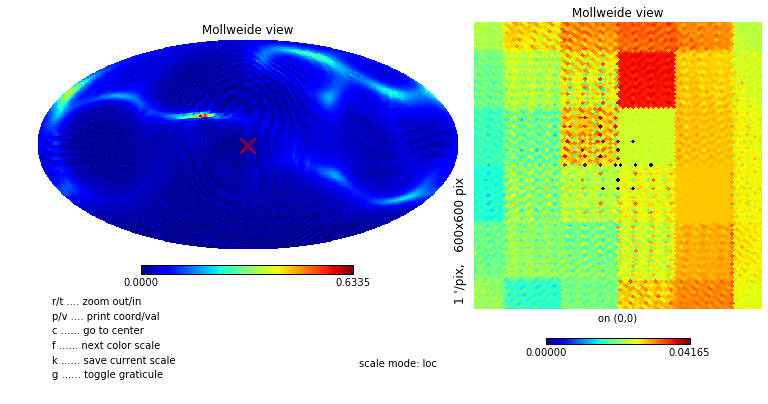

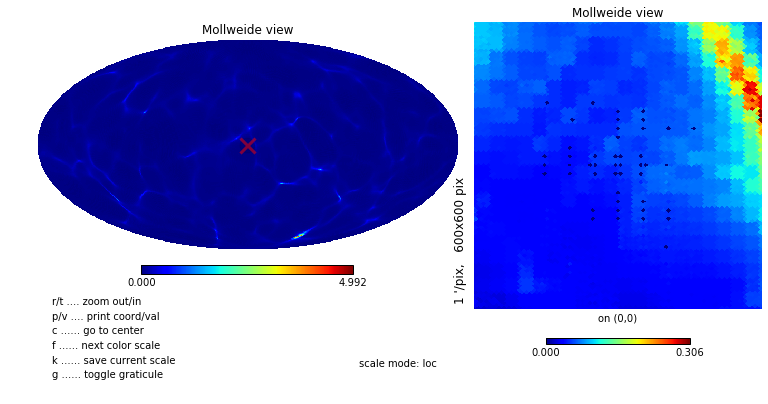

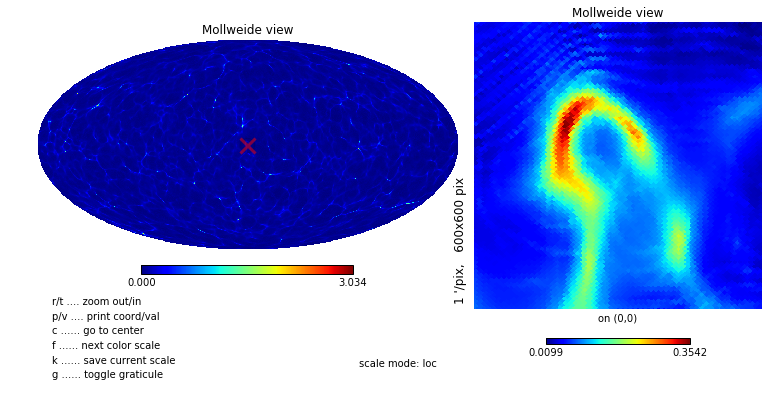

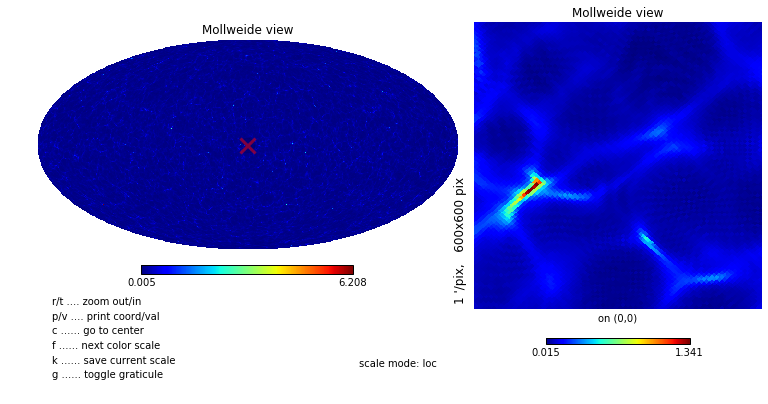

In [6]:
## first load first,middle and last map and check for checkerboard
for num in [25,100,300,600]:
    ma=hp.read_map(outdir+'/colore__imap_s1_nu%03d.fits'%num, verbose=False)
    plt.figure()
    hp.mollzoom(ma)

In [111]:
## load sources
srcs=np.hstack([pf.open(outdir+'/colore__srcs_s1_%i.fits'%i)[1].data for i in range(16)])

In [112]:
print srcs.dtype, len(srcs)

(numpy.record, [('TYPE', '>i4'), ('RA', '>f4'), ('DEC', '>f4'), ('Z_COSMO', '>f4'), ('DZ_RSD', '>f4')]) 1403525


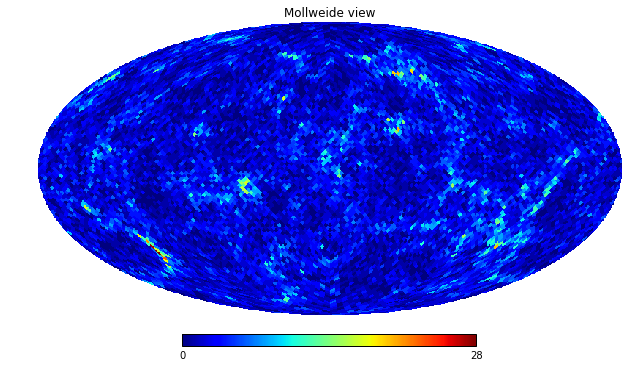

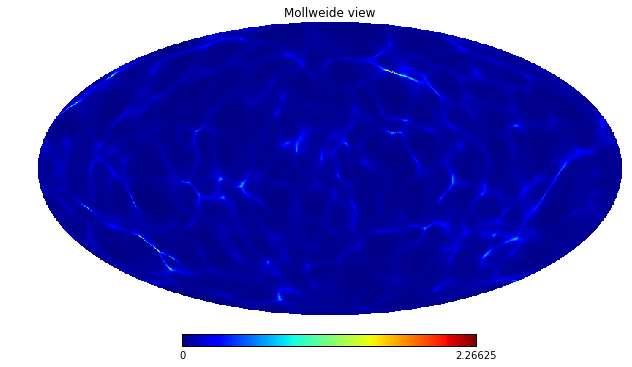

In [140]:
## are we seeing the same structure?

## let's try a slice
ndx,flo,fhi,zlo,zhi=np.loadtxt(outdir+'/cosmo_nuTable.dat',unpack=True)
slndx=120
ma=hp.read_map(outdir+'/colore__imap_s1_nu%03d.fits'%slndx, verbose=False)
w=np.where((srcs['Z_COSMO']>zlo[640-slndx+10]) & (srcs['Z_COSMO']<=zhi[640-slndx-10])) 
phi=srcs['RA'][w]*np.pi/180.
theta=np.pi/2-srcs['DEC'][w]*np.pi/180.
nside_test=32
ipix=hp.ang2pix(nside_test,theta,phi)
mas=np.bincount(ipix,minlength=nside_test**2*12)
plt.figure()
hp.mollview(mas)
plt.figure()
hp.mollview(ma)
